In [15]:
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
np.set_printoptions(suppress=True)

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, f1_score, fbeta_score, roc_curve

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [111]:
teams_list = sorted(list(df['posteam'].unique()))
teams_list

teams = {'ARI': [  .500, 295], 
         'ATL': [  .625, 353], 
         'BAL': [  .563, 395], 
         'BUF': [  .563, 302], 
         'CAR': [  .688, 363], 
         'CHI': [  .313, 264], 
         'CIN': [  .438, 290], 
         'CLE': [  .000, 234], 
         'DAL': [  .563, 354], 
         'DEN': [  .313, 289], 
         'DET': [  .563, 410], 
         'GB' : [  .438, 320], 
         'HOU': [  .250, 338], 
         'IND': [  .250, 263], 
         'JAX': [  .625, 417], 
         'KC' : [  .625, 415], 
         'LA' : [  .688, 478], 
         'LAC': [  .563, 355], 
         'MIA': [  .375, 281], 
         'MIN': [  .813, 382], 
         'NE' : [  .813, 458], 
         'NO' : [  .688, 448], 
         'NYG': [  .188, 246], 
         'NYJ': [  .313, 298], 
         'OAK': [  .563, 355], 
         'PHI': [  .813, 457], 
         'PIT': [  .813, 406], 
         'SEA': [  .563, 366], 
         'SF' : [  .375, 331], 
         'TB' : [  .313, 335], 
         'TEN': [  .563, 334], 
         'WAS': [  .438, 342], 
        }     

allteams = pd.DataFrame.from_dict(teams,orient='index', columns =['Winning_Percentage','Points_Scored'])
allteams

,Winning_Percentage,Points_Scored
ARI,0.500,295
ATL,0.625,353
BAL,0.563,395
BUF,0.563,302
CAR,0.688,363
CHI,0.313,264
CIN,0.438,290
CLE,0.000,234
DAL,0.563,354
DEN,0.313,289


In [3]:
df = pd.read_csv('NFLplays2017final.csv')

In [18]:
featcols = ['totyardstogo', 'FGrange', 'down', 'distance',         
        'half_secs_remain', 'game_secs_remain', 'second_half',     
        'shotgun', 'points_ahead', 'firstdown','seconddown',        
        'thirddown','fourthdown', 'thirdandlong','fourthandlong']  

belichick =  (df['shotgun'] == df['PASS']).astype(int))
df[belichick].sum()/df.count()

In [97]:
belichick =  (df['shotgun'] == df['PASS'])
df[belichick].count()[0]/df.count()[0]

0.7413504904279812

In [99]:
globalbelichick = df[belichick].count()[0]/df.count()[0]
globalbelichick

0.7413504904279812

In [125]:
for tm in teams_list:

    teamdf = df[df['posteam'] == tm]
    
    trailing = (teamdf['points_ahead'] < 0)
    allteams.loc[tm, 'Trailing_Percentage'] = teamdf[trailing].count()[0]/teamdf.count()[0]
    
    belichick =  (teamdf['shotgun'] == teamdf['PASS'])
    allteams.loc[tm,'belichick'] = teamdf[belichick].count()[0]/teamdf.count()[0]
    allteams.loc[tm,'Excess_Predictability'] =  100*(allteams.loc[tm,'belichick']- globalbelichick)
    allteams.loc[tm,'Predictability'] =  (allteams.loc[tm,'belichick'])

    
    shotgunpct =  (teamdf['shotgun'] == 1)
    allteams.loc[tm,'Shotgun_Percentage'] = teamdf[shotgunpct].count()[0]/teamdf.count()[0]

allteams = allteams.sort_values('Predictability')

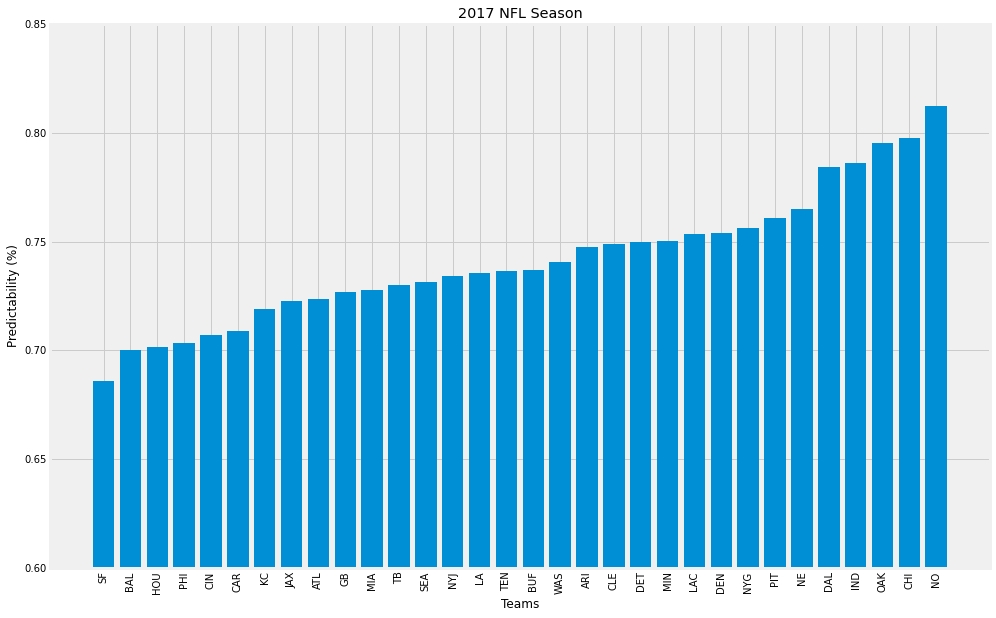

In [121]:
allteams = allteams.sort_values('Predictability')

plt.figure(figsize=(15, 10))
plt.bar(x=allteams.index, height=allteams['Predictability'])
plt.xticks(rotation=90);
plt.ylim([0.6,0.85])
plt.ylabel("Predictability (%)");
plt.xlabel("Teams");

plt.title("2017 NFL Season");
# plt.savefig('fig9',bbox_inches="tight")


In [126]:
allteams.columns

Index(['Winning_Percentage', 'Points_Scored', 'Trailing_Percentage',
       'belichick', 'Predictability_Percentage', 'Shotgun_Percentage',
       'Predictability', 'Excess_Predictability'],
      dtype='object')

<AxesSubplot:xlabel='Shotgun_Percentage', ylabel='Predictability_Percentage'>

<Figure size 432x288 with 0 Axes>

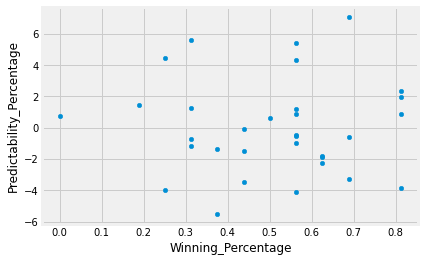

<Figure size 432x288 with 0 Axes>

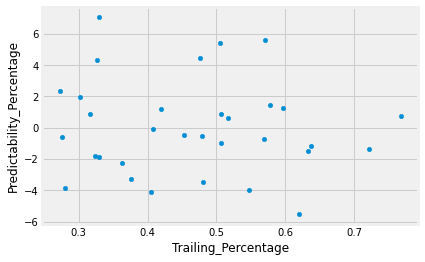

<Figure size 432x288 with 0 Axes>

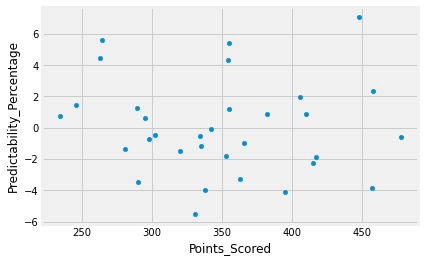

<Figure size 432x288 with 0 Axes>

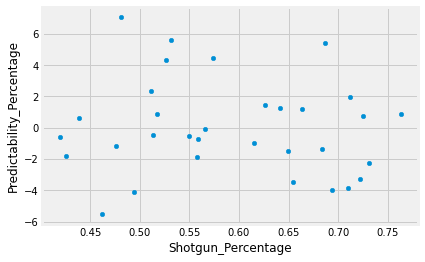

In [127]:
plt.figure()
allteams.plot.scatter(x='Winning_Percentage', y='Predictability_Percentage')

plt.figure()
allteams.plot.scatter(x='Trailing_Percentage', y='Predictability_Percentage')

plt.figure()
allteams.plot.scatter(x='Points_Scored', y='Predictability_Percentage')

plt.figure()
allteams.plot.scatter(x='Shotgun_Percentage', y='Predictability_Percentage')


# 	Winning_Pct	Points_Scored	trail	belichick	shotgunpct

In [73]:
teams_list[2]

'BAL'

In [ ]:
print("Baseline accuracy:  ",  19153/(19153+12554))
print("Train accuracy:  ", dectree.score(X_tr, y_tr))
print("Val accuracy:  ", dectree.score(X_val, y_val))


print("Train confusion matrix: \n\n", confusion_matrix(y_tr, dectree.predict(X_tr)),'\n')
print("Test confusion matrix: \n\n", confusion_matrix(y_val, dectree.predict(X_val),))

plt.figure(figsize=(15, 10))
train_confusion = confusion_matrix(y_tr, dectree.predict(X_tr), normalize='all')
sns.heatmap(train_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=['Run', 'Pass'],
           yticklabels=['Run', 'Pass'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree confusion matrix');

from sklearn.metrics import classification_report
print(classification_report(y_val, dectree.predict(X_val), target_names=['Run', 'Pass']))

In [ ]:
dectree = DecisionTreeClassifier(max_depth = 4, random_state=42, criterion = "gini")
scores = cross_val_score(dectree, X_tr, y_tr, cv=5, scoring='accuracy')
print(scores.mean())

dectree.fit(X_tr, y_tr)

print("Baseline accuracy:  ",  19153/(19153+12554))
print("Train accuracy:  ", dectree.score(X_tr, y_tr))
print("Val accuracy:  ", dectree.score(X_val, y_val))


print("Train confusion matrix: \n\n", confusion_matrix(y_tr, dectree.predict(X_tr)),'\n')
print("Test confusion matrix: \n\n", confusion_matrix(y_val, dectree.predict(X_val),))

plt.figure(figsize=(15, 10))
train_confusion = confusion_matrix(y_tr, dectree.predict(X_tr), normalize='all')
sns.heatmap(train_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=['Run', 'Pass'],
           yticklabels=['Run', 'Pass'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree confusion matrix');

from sklearn.metrics import classification_report
print(classification_report(y_val, dectree.predict(X_val), target_names=['Run', 'Pass']))